In [ ]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

#!pip install yfinance --upgrade --no-cache-dir
# Installing yfinance library ... if already installed comment line above

import yfinance as yf

### ```Exercise 01```

The log-likelihhod function is:

$$\boldsymbol\ell(\theta) = \sum^{n}_{i=1}\ln(\frac{\theta ^2}{x^3}\cdot\large e^{-\frac{\theta}{x}}\small) \space = \sum^{n}_{i=1}2\ln(\theta)-3\ln(x_{i})-\frac{\theta}{x_{i}}$$

<br>To find the MLE we find the maximum of the log-likelihood function, finding the derivative... <br><br>

$$\frac{\partial\ell(\theta)}{\partial\theta} = \sum^{n}\frac{2}{\theta} - \frac{1}{x_i} = \frac{2n}{\theta} - \sum^{n}\frac{1}{x_i} $$

And letting it be equal to zero:<br>

$\large\frac{2n}{\theta} - \sum\frac{1}{x_i} = 0\space$ &#8594; $\large\space\frac{2n}{\theta} = \sum\frac{1}{x_i}\space$ &#8594; $\large\space\hat\theta = \frac{2n}{\sum\frac{1}{x_i}}$

Where *n* is the length of the data array.<br><br>

In [ ]:
#Read the data
mydata = pd.read_csv("airquality.csv").Wind
mydata

0       7.4
1       8.0
2      12.6
3      11.5
4      14.3
       ... 
148     6.9
149    13.2
150    14.3
151     8.0
152    11.5
Name: Wind, Length: 153, dtype: float64

In [ ]:
def mle(x):
    serie = np.sum(x**(-1))
    return 2*len(x)/serie

MLE = mle(mydata)
MLE

16.8841959926002

Therefore we have found MLE = 16.8842<br>
Let's now show some plots:
<br><br>

In [ ]:
def loglike(t,x):   
    return sum([2*np.log(t) - 3*np.log(i)-t/i for i in x])

def pdf(x,t):
    return (t**2)/(x**3) * np.exp(-t/x)

def cdf(x,t):
    return np.exp(-t/x)*(t+x)/(x)


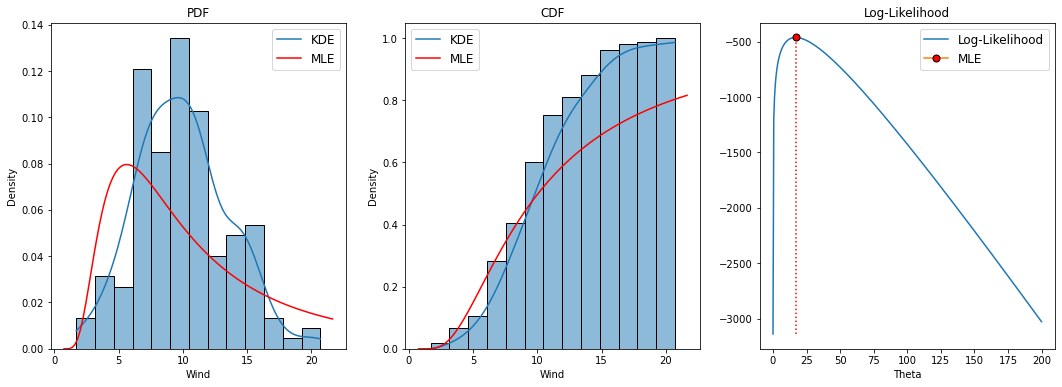

In [ ]:
#Create 3 subplots
fig, ax = plt.subplots(1,3,figsize=(18,6))

#The first plot
sns.histplot(mydata, kde=True, ax=ax[0], stat="density")
x0, x1 = ax[0].get_xlim()  # extract the endpoints for the x-axis of the first plot
xdata = np.linspace(x0, x1, 100)
ax[0].plot(xdata, pdf(xdata,MLE), color="red")
ax[0].set_title('PDF')
ax[0].legend(labels=["KDE","MLE"], fontsize = 'large')

#Plot 2
fig_1 = sns.histplot(mydata, kde=True,cumulative=True, ax=ax[1], stat="density")
fig_1.plot(xdata,cdf(xdata,MLE), color="red")
ax[1].set_title('CDF')
ax[1].legend(labels=["KDE","MLE"], fontsize = 'large')

#plot 3
param = np.linspace(0.001,200,350)
ax[2].plot(param,loglike(param,mydata))
ax[2].vlines(MLE,-3135,loglike(MLE,mydata),linestyle='dotted',color='r')
ax[2].plot(MLE, loglike(MLE,mydata), marker="o", markersize=7, markeredgecolor="black", markerfacecolor="red")
ax[2].set_xlabel('Theta')
ax[2].set_title('Log-Likelihood')
ax[2].legend(labels=['Log-Likelihood',"MLE"], fontsize = 'large')


The MLE is quiet a bad fit if we compare it to the data and the kernel density estimate, even though it is still the pdf that have the most probability to be the one that have generated the data, assuming that it's true our dataset comes from the parametric pdf given by the text.
<br><br>
**Little correction**: We found that the Expectation provided by the text was wrong and the correct mean is $\theta$ instead of $\frac{\theta}{2} \cdot$<br>

So having $\hat\theta\approx 16.8842$ we estimate the average Wind speed according to the MLE:<br>$\mathbb{E}(X) = \theta$ &#8594; plug in $\hat\theta$ &#8594; Wind Speed average estimate = $\hat\theta = 16.8842$<br><br>
To estimate the Standard Error of the MLE we use the Fisher information. Since the curvature of the function (third graph) around the maximum is quite steep I do not expect the ```SE``` to be very large. We know that:<br>
$$\hat{se} = I(\hat\theta)^{-\frac{1}{2}} = \sqrt{\frac{1}{I(\hat\theta)}}$$
And $$I(\theta) = -\mathbb{E}\LARGE[\small\frac{\partial^2}{\partial\theta^2}\ell(\theta)\LARGE]$$
We have that:<br>
$$\frac{\partial}{\partial\theta}\ell(\theta) = \frac{2n}{\theta} - \sum^{n}\frac{1}{x_i}$$<br>
Then the second derivative is:<br>
$$\frac{\partial^2}{\partial\theta^2}\ell(\theta) = -\frac{2n}{\theta^2}$$<br>
The Fisher Information is then:<br><br>
$$I(\theta) = -\mathbb{E}\LARGE[\small-\frac{2n}{\theta^2}\LARGE]\small = \mathbb{E}\LARGE[\small\frac{2n}{\theta^2}\LARGE]\small =\frac{2n}{\theta^2} $$<br>
Finally the Standard Error:<br>
$$\hat se \approx\sqrt{\frac{\theta^2}{2n}} = \frac{\theta}{\sqrt{2n}}$$<br>
We plug in $\hat\theta = 16.8842$ and $n = 153$ (that's the size of our 'Wind' data) and we got:<br><br>
$$\hat se = \frac{16.8842}{\sqrt{306}} \approx 0.965$$<br>

**Parametric bootstrap:**

Parametric bootstrapping assumes that the data comes from a known distribution with unknown parameters, which is exactly our case. So we estimate the parameter from the data that we have and then we use the estimated distribution to simulate the 
samples. In our case we have only one parameter $\theta$ and with MLE we have its estimate $\hat\theta\approx 16.8842$

Also the parametric pdf provided, $f(x\,|\,\theta) = \frac{\theta^2}{x^3} \cdot \mathrm{e}^{-\tfrac{\theta}{x}}$, it's an Inverse Gamma Distribution: $${\displaystyle f(x;\alpha ,\beta )={\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}(1/x)^{\alpha +1}e^\left(-\beta /x\right)}$$

Where $\alpha = 2$ and $\beta = \theta$, so we'll use the default *invgamma* pdf provided by scipy for sampling, with those parameters. It's plotted below.


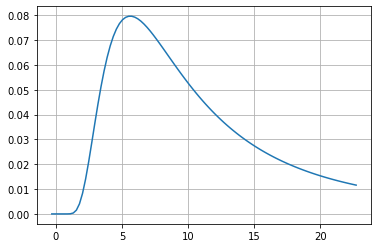

In [ ]:
from scipy.stats import invgamma
mypdf = invgamma(2,scale=MLE)    #trying scipy's inverse gamma
x0, x1 = ax[0].get_xlim()  # extract the endpoints for the x-axis of the first plot
xdata = np.linspace(x0, x1, 100)
_=plt.plot(xdata,mypdf.pdf(xdata))
plt.grid(True)

Let's proceed with parametric bootstrap

In [ ]:
#doing paremetric bootstrapping
meanDist = np.zeros(1000)
for r in range(1000):
    B = mypdf.rvs(size=153,random_state=r) #random sampling 1000 arrays of size 153, with seed for reproducibility
    meanDist[r]=B.mean()
    
#meanDist it's the array where each element is the mean of each bootstrapped sample

Bootstrap-simulated mean =  16.903396131265787
Mean of the pdf E(x) = theta:  16.8841959926002
Confidence interval =  [13.25515852 23.89253107]
Standard Deviation:  3.1937944777593326

The plot shows the distribution of the means of the "bootstrapped" samples.
The confidence interval is highlighted in green



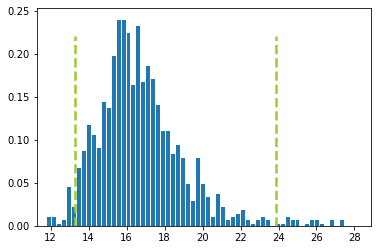

In [ ]:
#plotting the distribution of the means of the bootstrapped samples.
#The distribution of the means of the 200 samples of size 153 got from our pdf seems to follow just the dist. of the pdf
plt.hist(meanDist,density=True,bins=200,edgecolor='white')

#printing the mean of the means, the result is very close to the MLE estimate, which is theta.

print('Bootstrap-simulated mean = ',meanDist.mean())
print('Mean of the pdf E(x) = theta: ',MLE)
conf_interval = np.percentile(meanDist,[2.5,97.5])
print('Confidence interval = ',conf_interval)
print('Standard Deviation: ',meanDist.std())
plt.vlines(conf_interval[0],0,0.22,colors='yellowgreen',linestyle='dashed',lw=2.5)
plt.vlines(conf_interval[1],0,0.22,colors='yellowgreen',linestyle='dashed',lw=2.5)
plt.xlim(conf_interval[0]-2,conf_interval[1]+5)
print('\nThe plot shows the distribution of the means of the "bootstrapped" samples.\nThe confidence interval is highlighted in green\n')

Mean of the original data:  9.95751633986928
Mean of bootstrap distribution:  9.957896732026144
Confidence interval =  [ 9.39668301 10.5047549 ]


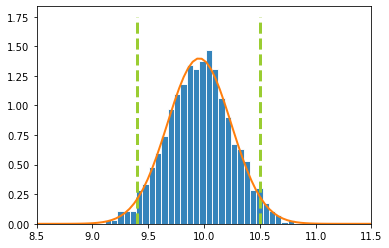

In [ ]:
#trying to do non-parametric bootstrap, (resampling from the wind sample)
N=len(mydata)
B = 1000
DistOfMeans = np.zeros(B)
for b in range(B):
    s = mydata.sample(n=N, replace = True, random_state=b+2910) #resampling with replacement from our data with a random seed
    DistOfMeans[b] = s.mean()

def norm(x,m,s):                                                    #just a normal distribution
    return (1/(s*((np.pi*2)**(1/2))))*np.exp(-(x-m)**2/(2*(s**2)))

x = np.linspace(8,12,100)
plt.hist(DistOfMeans,density=True,bins=30,alpha=0.9,edgecolor="white")
_=plt.plot(x,norm(x,DistOfMeans.mean(),DistOfMeans.std()),lw=2)
print('Mean of the original data: ',mydata.mean())
print('Mean of bootstrap distribution: ',DistOfMeans.mean())
confidence = np.percentile(DistOfMeans,[2.5,97.5])
print('Confidence interval = ',confidence)
plt.vlines(confidence[0],0,1.75,colors='yellowgreen',linestyle='dashed',lw=3)
plt.vlines(confidence[1],0,1.75,colors='yellowgreen',linestyle='dashed',lw=3)
_=plt.xlim(8.5,11.5)

### ```Exercise 02```

$$
Var(\omega \cdot X + (1 - \omega) \cdot Y )
$$
Is the Volatility of our investment. 
**For which value of Omega is the variance minized ?** 

First, ```let```

$$
\sigma_X^2 = Var(X)\\
\sigma_Y^2 = Var(Y)\\
\sigma_{X, Y} = Cov(X,Y)\\
$$

We simplify the variance as follows:

$$
Var(\omega \cdot X + (1 - \omega) \cdot Y ) = Var(\omega \cdot X + Y - \omega \cdot Y) = \\
= Var(\omega X ) + Var(Y) + Var(\omega Y) + 2 Cov(\omega X,Y) - 2 Cov(\omega X, \omega Y) - 2 Cov(Y, \omega Y)= \\
= \omega^2 \sigma_X^2 + \sigma_Y^2 + \omega^2 \sigma_Y^2 + 2 \omega \sigma_{X, Y} - 2 \omega^2 \sigma_{X, Y} - 2 \omega \sigma_Y^2 = \\
= \omega^2(\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{X, Y}) + 2 \omega(\sigma_{X, Y} - \sigma_Y^2) + \sigma_Y^2
$$

Now, to minimize $\omega$, we set <span style="color:blue">$ \large \frac{ \partial Var(\omega \cdot X + (1 - \omega) \cdot Y )}{\partial \omega} = 0$ 

$$
\implies \frac{\partial \space \omega^2(\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{X, Y}) + 2 \omega(\sigma_{X, Y} - \sigma_Y^2) + \sigma_Y^2}{\partial \omega} = 0 \\
\\  
\implies 2\omega(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{X, Y}) + 2(\sigma_{X,Y} - \sigma_Y^2) = 0\\
$$

Simplifying, we get
$$
\omega^{\star} = \frac{\sigma_Y^2 - \sigma_{X,Y}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{X,Y}}
$$

### 2.1

In [ ]:
 # Retrieve data on "AMAZON" and "INVIDIA" stock prices in the year 2020 and visualize head
df = yf.download("AMZN NVDA", start="2019-01-01", end="2020-01-01", group_by="ticker") 
df.head()

[*********************100%***********************]  2 of 2 completed


AMZN                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2018-12-31  1510.800049  1520.760010  1487.000000  1501.969971  1501.969971   
2019-01-02  1465.199951  1553.359985  1460.930054  1539.130005  1539.130005   
2019-01-03  1520.010010  1538.000000  1497.109985  1500.280029  1500.280029   
2019-01-04  1530.000000  1594.000000  1518.310059  1575.390015  1575.390015   
2019-01-07  1602.310059  1634.560059  1589.189941  1629.510010  1629.510010   

                          NVDA                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2018-12-31  6954500  33.849998  34.177502  33.064999  33.375000  33.155777   
2019-01-02  7983100  32.660000  34.619999  32.512501  34.055000  33.831322   
2019-01-03  6975600  33.447498  33.790001  31.922501  31.997499  31.787333   
2019-01-04  9182600  32.735001  34.432499  32.424999  34.047501  33.823860   
2019-01-07  7993200  34.625000  36.222500  34.107498  35.849998  35.614525   

                      
              Volume  
Date                  
2018-12-31  46514000  
2019-01-02  50875200  
2019-01-03  70555200  
2019-01-04  58562000  
2019-01-07  70916000

In [ ]:
# Calculate the performance of a stock as (ClosingPrice - OpeningPrice) / OpeningPrice
amzn_perf = (df.AMZN.Close-df.AMZN.Open)/df.AMZN.Open
nvda_perf = (df.NVDA.Close-df.NVDA.Open)/df.NVDA.Open

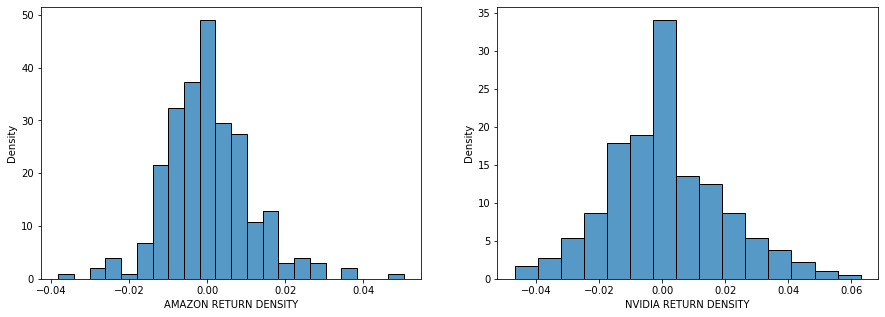

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5)) 
sns.histplot(amzn_perf, ax = ax[0], stat = 'density')
ax[0].set(xlabel = 'AMAZON RETURN DENSITY')
sns.histplot(nvda_perf, ax = ax[1], stat = 'density')
ax[1].set(xlabel = 'NVIDIA RETURN DENSITY')

plt.show()

In [ ]:
# Our Yeild Return
def Z (X, Y, omega) : 
    return (omega * X ) + ((1-omega)*Y)


In [ ]:
# Non parametric BootStrap for Standard error
B = 1000
boot_res = np.zeros(B)

for b in range(B): 
    # Sample from the stock performance
    X = amzn_perf.sample(n = len(df), replace = True)
    Y = nvda_perf.sample(n = len(df), replace = True)
    # Plug in our estimator on the bootstrap samples
    omega = (Y.var() - Y.cov(X)) / (X.var() + Y.var() - (2 * Y.cov(X)))
    # Add omega to our result 
    boot_res[b] = omega
    
    

In [ ]:
#BootStrapped SE
boot_res.std()

0.17099738580960044

In [ ]:
# BootStrapped MSE
theta = (nvda_perf.var() - nvda_perf.cov(amzn_perf)) / (amzn_perf.var() + nvda_perf.var() -  (2 *nvda_perf.cov(amzn_perf)))
bias = pow(boot_res.mean() - theta, 2)
boot_res.var() + bias

0.02931223148844502

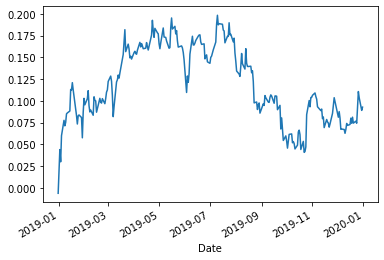

In [ ]:
Z(amzn_perf, nvda_perf, boot_res.sum()/B).cumsum().plot()

plt.show()
